In [1]:
import os
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt

data_folder = "fixed_csv"
all_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.csv')]

data_frames = []
for file in all_files:
    df = pd.read_csv(file, sep=',')
    data_frames.append(df)

# Combine all data
data = pd.concat(data_frames, ignore_index=True)



In [2]:
data_frames[0].sample(10)

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
90431,Municipal,11,20,1997,5,21,10,11,Domingo,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
242900,Municipal,31,38,1997,5,6,25,24,Sábado,Accidente en intersección,...,0,0,0,0,0,1,0,0,No fatal,Cifras Revisadas
62178,Municipal,8,21,1997,11,19,30,8,Sábado,Sin accidente en esta zona,...,0,0,0,0,0,0,0,0,No fatal,Cifras Revisadas
52658,Municipal,8,37,1997,7,10,10,1,Martes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
144601,Municipal,19,26,1997,3,15,36,29,Sábado,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
230326,Municipal,28,18,1997,6,23,30,13,Viernes,Sin accidente en esta zona,...,0,0,0,0,0,0,0,0,No fatal,Cifras Revisadas
69052,Municipal,9,2,1997,3,6,1,4,Martes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
50256,Municipal,8,32,1997,6,14,25,21,Sábado,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
231860,Municipal,28,41,1997,7,2,45,30,Miércoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Revisadas
223355,Municipal,27,4,1997,1,16,0,18,Sábado,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas


In [29]:
df_agg = data.groupby(['ANIO', 'MES']).size().reset_index(name='ACCIDENT_COUNT')
df_agg['time'] = df_agg['ANIO'] + (df_agg['MES'] - 1) / 12

df_agg['month_sin'] = np.sin(2 * np.pi * df_agg['MES'] / 12)
df_agg['month_cos'] = np.cos(2 * np.pi * df_agg['MES'] / 12)

X = df_agg[['time', 'month_sin', 'month_cos']]
y = df_agg['ACCIDENT_COUNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

In [30]:
print(df_agg.head())

   ANIO  MES  ACCIDENT_COUNT         time  month_sin     month_cos
0  1997    1           18515  1997.000000   0.500000  8.660254e-01
1  1997    2           18407  1997.083333   0.866025  5.000000e-01
2  1997    3           20004  1997.166667   1.000000  6.123234e-17
3  1997    4           20175  1997.250000   0.866025 -5.000000e-01
4  1997    5           20915  1997.333333   0.500000 -8.660254e-01


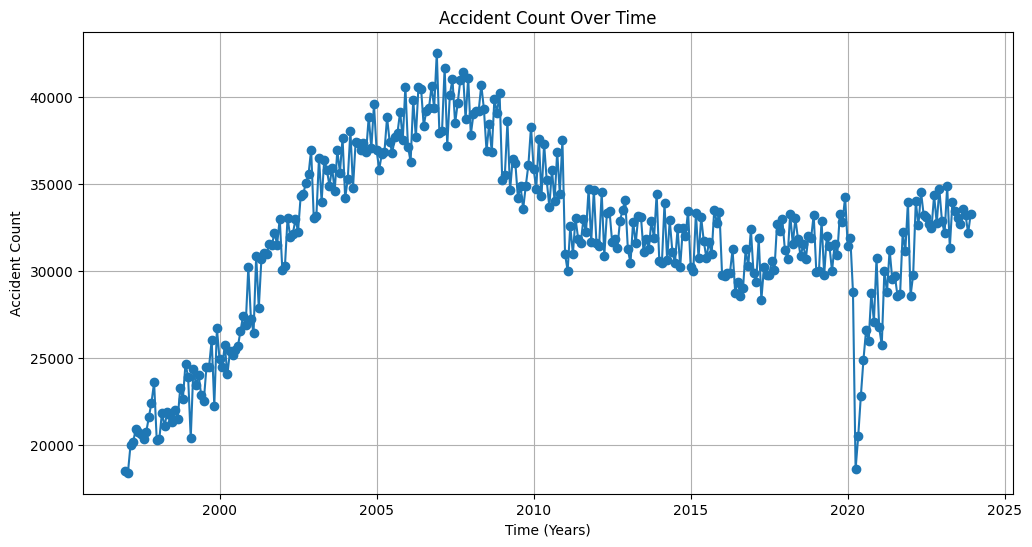

In [31]:
#plot accedent count by anio and mes
plt.figure(figsize=(12, 6))
plt.plot(df_agg['time'], df_agg['ACCIDENT_COUNT'], marker='o', linestyle='-')
plt.title('Accident Count Over Time')
plt.xlabel('Time (Years)')
plt.ylabel('Accident Count')
plt.grid()
plt.show()

In [32]:
print(X_train)

            time     month_sin     month_cos
150  2009.500000 -5.000000e-01 -8.660254e-01
250  2017.833333 -5.000000e-01  8.660254e-01
57   2001.750000 -8.660254e-01  5.000000e-01
148  2009.333333  5.000000e-01 -8.660254e-01
32   1999.666667 -1.000000e+00 -1.836970e-16
..           ...           ...           ...
189  2012.750000 -8.660254e-01  5.000000e-01
195  2013.250000  8.660254e-01 -5.000000e-01
203  2013.916667 -2.449294e-16  1.000000e+00
241  2017.083333  8.660254e-01  5.000000e-01
232  2016.333333  5.000000e-01 -8.660254e-01

[291 rows x 3 columns]


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Inicializar modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=0),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)
}

# Entrenar y almacenar predicciones
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = y_pred

In [36]:
def evaluate_models(y_true, y_preds):
    metrics = []
    for name, y_pred in y_preds.items():
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        metrics.append({
            'Model': name,
            'MSE': round(mse, 2),
            'MAE': round(mae, 2),
            'R²': round(r2, 2)
        })
    return pd.DataFrame(metrics)

# Mostrar resultados
results_df = evaluate_models(y_test, results)
print(results_df)

               Model          MSE      MAE    R²
0  Linear Regression  29990985.15  4401.12 -0.13
1      Random Forest   1530132.59  1048.04  0.94
2            XGBoost    651924.75   593.92  0.98
3      MLP Regressor  29760292.09  4250.80 -0.12


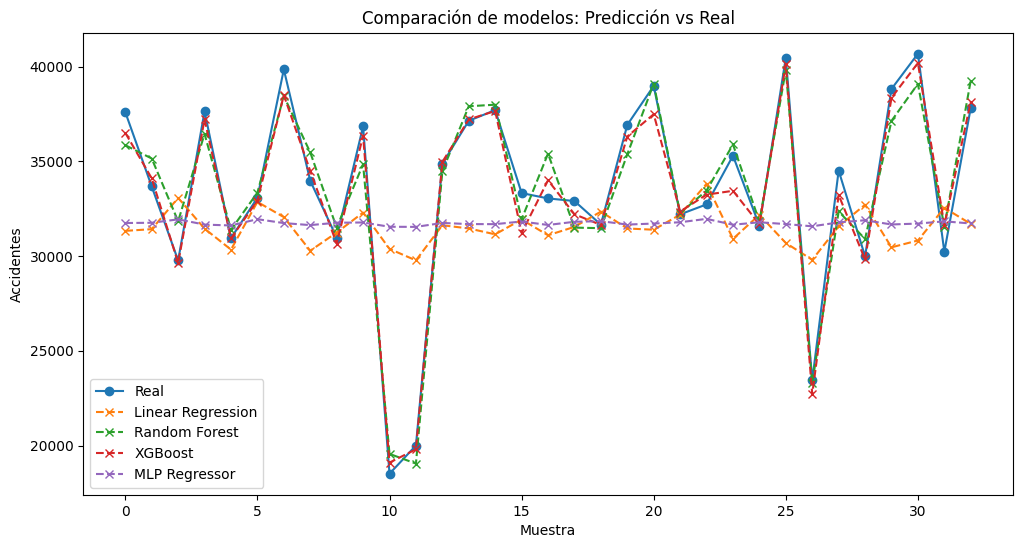

In [37]:
import matplotlib.pyplot as plt

# Gráfico de predicciones vs. realidad
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Real', marker='o')
for name, y_pred in results.items():
    plt.plot(y_pred, label=name, marker='x', linestyle='--')
plt.legend()
plt.title('Comparación de modelos: Predicción vs Real')
plt.xlabel('Muestra')
plt.ylabel('Accidentes')
plt.show()